In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Kmeans from scratch

class Kmeans:
    def __init__(self, k=2, max_iters=100):
        self.centroids = None
        self.k = k
        self.max_iters = max_iters

    def fit(self, x):
        # assign random centroids
        self.centroids = x[np.random.choice(x.shape[0], self.k, replace=False)]

        # assign labels
        for _ in range(self.max_iters):
            labels = self.assign_labels(x)

            # Update centroids
            updated_centroids = self.update_centroids(x, labels)

            # Check for convergence
            if np.all(self.centroids == updated_centroids):
                break

            self.centroids = updated_centroids


    def assign_labels(self, x):
        distances = np.zeros((x.shape[0], self.k))
        for i, centroid in enumerate(self.centroids):
            distances[:, i] = np.linalg.norm(x - centroid, axis=1)

        return np.argmax(distances, axis=1)


    def update_centroids(self, x, labels):
        updated_centroids = np.zeros((self.k, x.shape[1]))
        for i in range(self.k):
            updated_centroids[i] = np.mean(x[labels == i], axis=0)

        return updated_centroids


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/faithful.csv')

In [4]:
x = df[['eruptions', 'waiting']].values

In [5]:
kmeans = Kmeans(k=2)
kmeans.fit(x)

In [6]:
labels = kmeans.assign_labels(x)
labels

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [7]:
centroids = kmeans.centroids
centroids

array([[ 2.09433   , 54.75      ],
       [ 4.29793023, 80.28488372]])

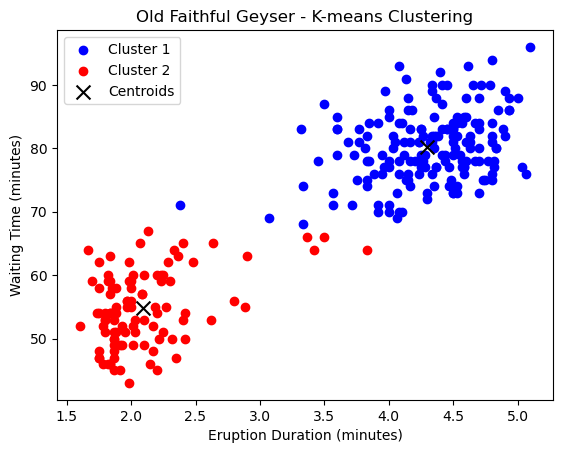

In [8]:
colors = ['blue', 'red']
for i in range(len(colors)):
    plt.scatter(x[labels == i, 0], x[labels == i, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')
plt.xlabel('Eruption Duration (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.title('Old Faithful Geyser - K-means Clustering')
plt.legend()
plt.show()